# OpenDC MultiModel Demo

> this file assembles multiple simulation models into a single simulation tool -- <b>the multimodel</b>
> we leverage the outputs of the simulation models, in the same plot
> and more :>

### 0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pyarrow.parquet as pq
import fastparquet as fp

### 1. Load the outputs of the simulation models

In [2]:
os.chdir('../../../../../demo/output/simulation-results')
print("We are now in: ", os.getcwd())

# loop through the files, take only the first word of the file name, which is in format modelname-*
model_names = [file.split('-')[0] for file in os.listdir()]
directories = [d for d in os.listdir() if os.path.isdir(d)]

# output data is a list of lists -- there are multiple arrays, and each array has data for host, server, service, in this order
# basically we will have
host_data = []
server_data = []
service_data = []

print(directories)

# loop through each directory and add the data to the list
for directory in directories:
    host_data.append(pd.read_parquet(os.path.join(directory, 'host.parquet')))
    server_data.append(pd.read_parquet(os.path.join(directory, 'server.parquet')))
    service_data.append(pd.read_parquet(os.path.join(directory, 'service.parquet')))

We are now in:  /Users/raz/atlarge/opendc/demo/output/simulation-results
['scenario-simple-model-linearPowerModel-200.0-350.0-scheduler-Mem-topology-topologies-topology-very-single.json-19e6b2a5', 'scenario-simple-model-linearPowerModel-200.0-350.0-scheduler-Mem-topology-topologies-topology-very-single.json-8589863e', 'scenario-simple-model-sqrtPowerModel-200.0-350.0-scheduler-Mem-topology-topologies-topology-single.json-da112dce', 'scenario-simple-model-linearPowerModel-200.0-350.0-scheduler-Mem-topology-topologies-topology-very-single.json-34bf5727', 'scenario-simple-model-linearPowerModel-200.0-350.0-scheduler-Mem-topology-topologies-topology-very-single.json-aae0172e', 'scenario-simple-model-linearPowerModel-200.0-350.0-scheduler-Mem-topology-topologies-topology-very-single.json-a93605da', 'scenario-simple-model-sqrtPowerModel-200.0-350.0-scheduler-Mem-topology-topologies-topology-single.json-b9b34193', 'scenario-simple-model-sqrtPowerModel-200.0-350.0-scheduler-Mem-topology-topolo

### 2. Define useful functions

In [3]:
def mean_of_chunks(series, chunk_size):
    return series.groupby(np.arange(len(series)) // chunk_size).mean(numeric_only=True)

In [4]:
def plot_singular_model(single_model):
    plt.figure(figsize=(20,10))
    plt.plot(single_model)
    plt.show()

In [5]:
def plot_multi_model(multi_model):
    plt.figure(figsize=(20,10))
    for model in multi_model:
        plt.ylabel("POwer draw [W]")
        plt.xlabel("Seconds [S]")
        
        # make the y-label between 0-500
        plt.ylim(0, 500)
        
        # add some shadows up and down as a standard deviation
        plt.fill_between(model.index, model - 10, model + 10, color='gray', alpha=0.5)
        
        plt.ylim(0, 500)
        plt.plot(model)
    plt.show()

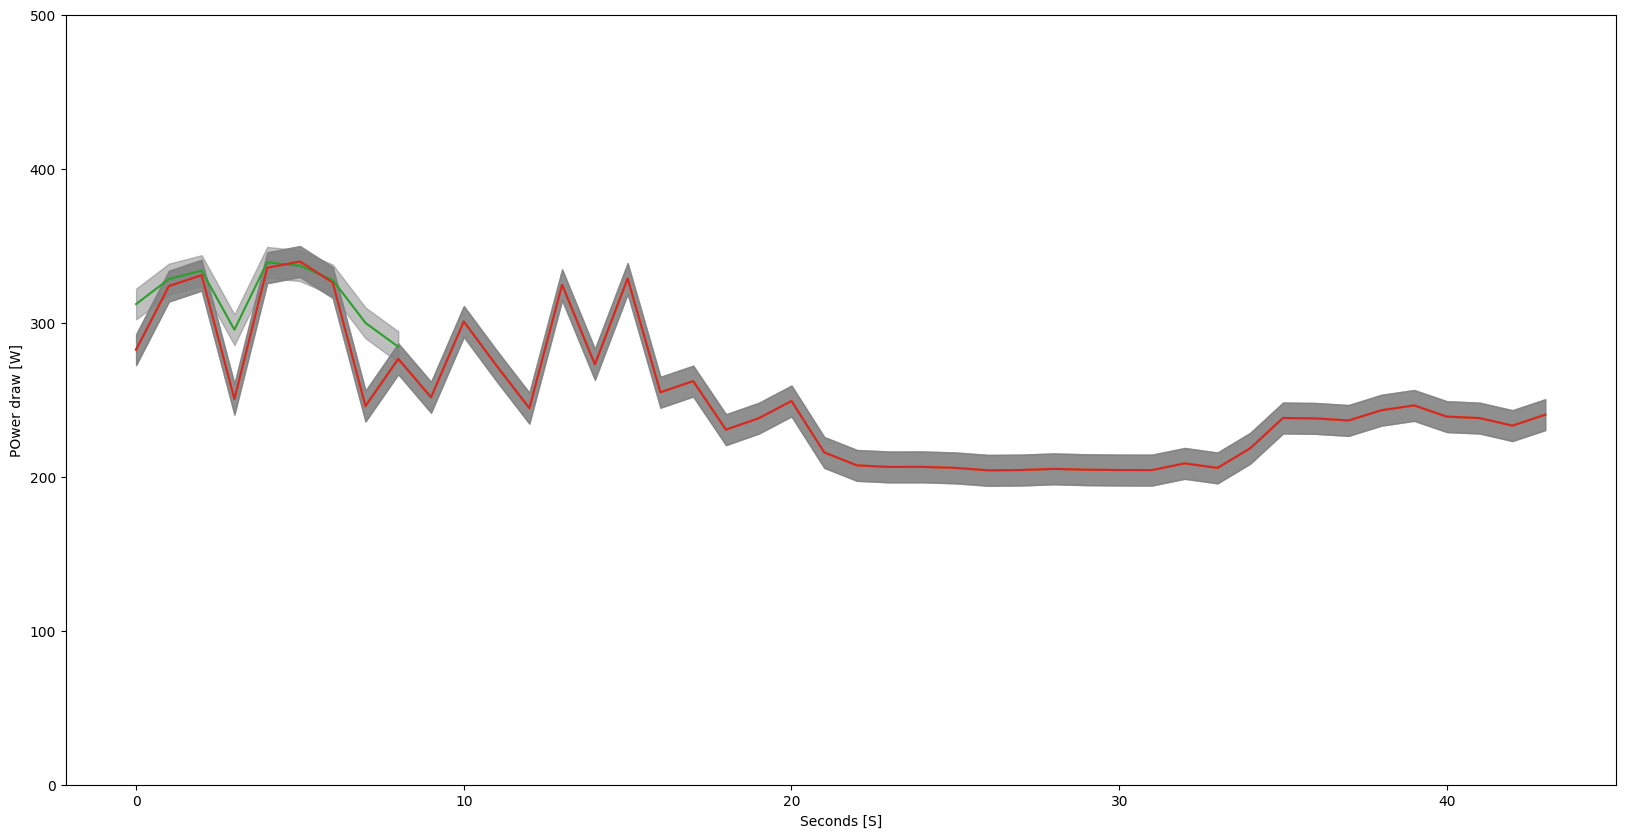

True


In [6]:
### 3. Plot the outputs of the simulation models
simulation_data = [
    mean_of_chunks(host_data[0]['power_draw'], 1000),
    mean_of_chunks(host_data[1]['power_draw'], 1000),
    mean_of_chunks(host_data[2]['power_draw'], 1000),
    mean_of_chunks(host_data[3]['power_draw'], 1000),
]

plot_multi_model(simulation_data)
areEqual = host_data[0].equals(host_data[3])
print(areEqual)

In [ ]:
host_data[0]

In [ ]:
# print host_data as a table
service_data[0]
